# Face Detection and Eye Detection with Haar Cascades



In [105]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [106]:
face1 = cv2.imread('../DATA/face.jpg',0)
many_faces = cv2.imread('../DATA/many_face.jpg',0)

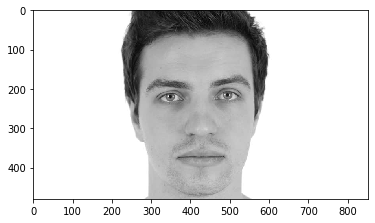

In [107]:
plt.imshow(face1, cmap = 'gray')

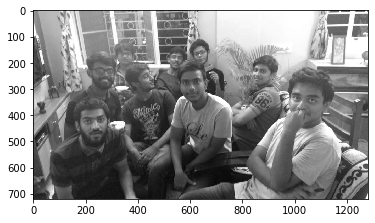

In [108]:
plt.imshow(many_faces,cmap='gray')

## Face Detection

In [109]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [110]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 5) 
        
    return face_img
    

In [111]:
result = detect_face(face1)

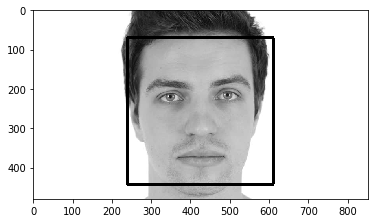

In [112]:
plt.imshow(result,cmap = 'gray')

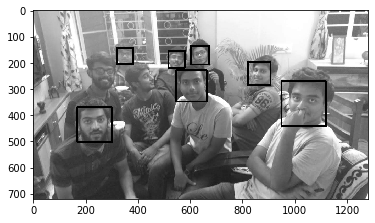

In [114]:
result = detect_face(many_faces) 
plt.imshow(result,cmap='gray')      # failes to detect 2 of the faces

In [145]:
# Adjusting the detect function in an attempt to detect the other 2 faces

def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.5, minNeighbors=2) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,0,0), 5) 
        
    return face_img
    

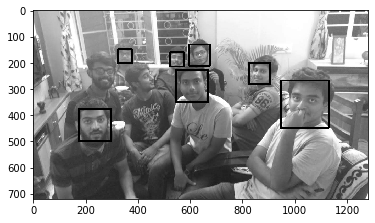

In [147]:
result = adj_detect_face(many_faces)
plt.imshow(result,cmap='gray')      # The function still fails to detect the 2 faces

## Eye Detection

In [148]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [169]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img, scaleFactor = 1.5, minNeighbors = 3) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 5) 
        
    return face_img
    

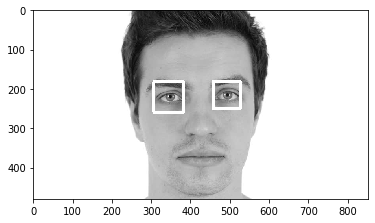

In [154]:
result = detect_eyes(face1)
plt.imshow(result,cmap='gray')

In [170]:
eyes = eye_cascade.detectMultiScale(many_faces) 

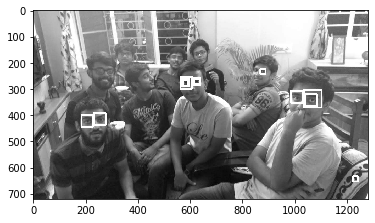

In [171]:
# Detection function doesnot really perform well in this image

result = detect_eyes(many_faces)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Face detection with video

In [76]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

### This is a face detected by my laptop webcam
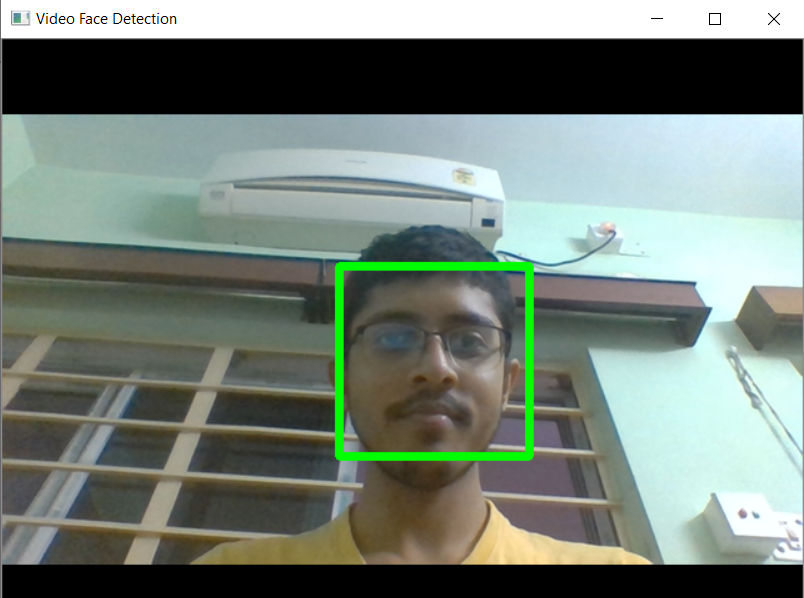

# THE END